In [43]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.datasets import make_classification

# Utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
pd.options.display.max_columns = 100

In [45]:
def plot_confusion_matrix( cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues ):
    
    if normalize:
        cm = cm.astype( 'float' ) / cm.sum( axis = 1 )[ :, np.newaxis ]
        print( 'Normalized confusion matrix' )
    else:
        print( 'Confusion matrix, without normalization' )

    #print( cm )

    plt.imshow( cm, interpolation = 'nearest', cmap = cmap )
    plt.title( title )
    plt.colorbar()
    tick_marks = np.arange( len( classes ) )
    plt.xticks( tick_marks, classes, rotation = 45 )
    plt.yticks( tick_marks, classes )

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product( range( cm.shape[ 0 ] ), range( cm.shape[ 1 ] ) ):
        plt.text( j, i, format( cm[ i, j ], fmt ),
                 horizontalalignment = 'center',
                 color = 'white' if cm[ i, j ] > thresh else 'black' )

    plt.tight_layout()
    plt.ylabel( 'True label' )
    plt.xlabel( 'Predicted label' )

# Importando el dataset

In [46]:
music_df = pd.read_csv( './data/msd_genre_dataset.txt' )

In [47]:
music_df.shape

(59600, 34)

In [48]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [49]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [50]:
music_df[ 'genre' ].value_counts()

classic pop and rock     23895
folk                     13192
dance and electronica     4935
jazz and blues            4334
soul and reggae           4016
punk                      3200
metal                     2103
classical                 1874
pop                       1617
hip-hop                    434
Name: genre, dtype: int64

# 1. IDENTIFICACIÓN DE LOS GENEROS MUSICALES METAL Y POP 

In [51]:
genres = [ 'metal', 'pop' ]
music_df_filter = music_df.loc[ music_df[ 'genre' ].isin( genres ) ]

In [52]:
music_df_filter.shape

(3720, 34)

# Clase negativa Metal- Clase positiva POP

Usualmente la clase negativa es la más grande y la positiva la más pequeña,por eso en este caso Metal sera la negativa y pop como positiva.

In [53]:
music_df_filter.loc[ music_df_filter[ 'genre' ] == 'metal', 'genre' ] = 0
music_df_filter.loc[ music_df_filter[ 'genre' ] == 'pop', 'genre' ] = 1

D:\programasAparte\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [54]:
music_df_filter[ 'genre' ].value_counts( dropna = False )

0    2103
1    1617
Name: genre, dtype: int64

In [55]:
X = music_df_filter[ music_df_filter.columns.tolist()[ 4: ] ]

# 2. ELECCIÓN DE VARIABLES

#### Las variables que se descartaron fueron track, artisc_name y title, debido a que son variables que no nos permiten realizar esa agrupación de intancias similares o distintas, ejemplo el nombre artista  no es algo que me permita distinguir o saber el genero musical

In [56]:
music_df_filter.columns.tolist()[ 4: ]

['loudness',
 'tempo',
 'time_signature',
 'key',
 'mode',
 'duration',
 'avg_timbre1',
 'avg_timbre2',
 'avg_timbre3',
 'avg_timbre4',
 'avg_timbre5',
 'avg_timbre6',
 'avg_timbre7',
 'avg_timbre8',
 'avg_timbre9',
 'avg_timbre10',
 'avg_timbre11',
 'avg_timbre12',
 'var_timbre1',
 'var_timbre2',
 'var_timbre3',
 'var_timbre4',
 'var_timbre5',
 'var_timbre6',
 'var_timbre7',
 'var_timbre8',
 'var_timbre9',
 'var_timbre10',
 'var_timbre11',
 'var_timbre12']

# 3. PARTICIÓN EN PRUEBA Y ENTRENAMIENTO

In [57]:
Y = music_df_filter[ 'genre' ]

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )

In [59]:
X_train.shape

(2604, 30)

In [60]:
X_test.shape

(1116, 30)

# 4: METODO DE ESCALADO

# Preprocessing

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )

In [62]:
X_test = scaler.transform( X_test )

# Regresión Logística

In [63]:
logmodel = LogisticRegression( random_state = 1 )

In [64]:
logmodel.fit( X_train, Y_train.astype( int ) )

LogisticRegression(random_state=1)

In [65]:
logmodel_predictions = logmodel.predict( X_test )

Confusion matrix, without normalization


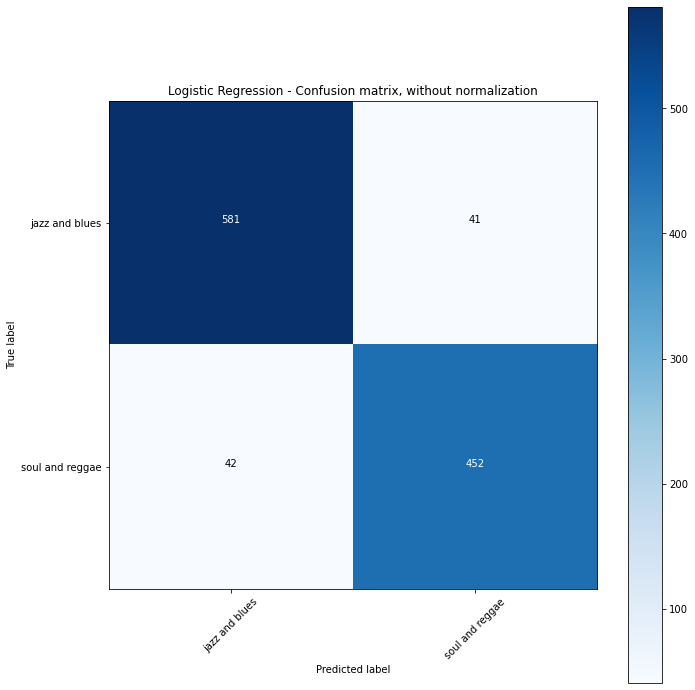

In [66]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), logmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Logistic Regression - Confusion matrix, without normalization' )

In [67]:
accuracy_score( Y_test.tolist(), logmodel_predictions )

0.9256272401433692

In [68]:
precision_score( Y_test.tolist(), logmodel_predictions )

0.9168356997971603

# Redes Neuronales

In [69]:
neuralmodel = MLPClassifier( random_state = 1 )

In [70]:
neuralmodel.fit( X_train, Y_train.astype( int ) )

D:\programasAparte\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [71]:
neuralmodel_predictions = neuralmodel.predict( X_test )

Confusion matrix, without normalization


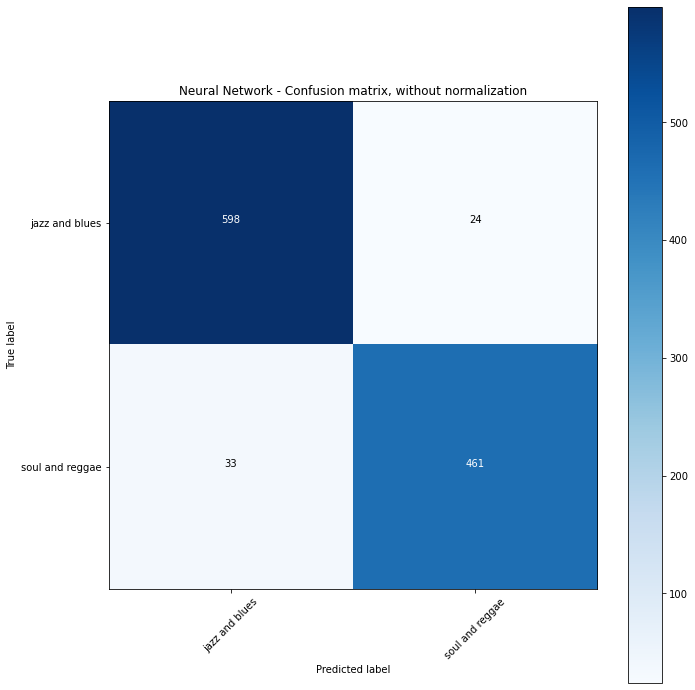

In [72]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), neuralmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Neural Network - Confusion matrix, without normalization' )

In [73]:
accuracy_score( Y_test.tolist(), neuralmodel_predictions )

0.9489247311827957

In [74]:
precision_score( Y_test.tolist(), neuralmodel_predictions )

0.9505154639175257

# SVM

In [75]:
svmmodel = SVC( random_state = 1 )

In [76]:
svmmodel.fit( X_train, Y_train.astype( int ) )

SVC(random_state=1)

In [77]:
svmmodel_predictions = svmmodel.predict( X_test )

Confusion matrix, without normalization


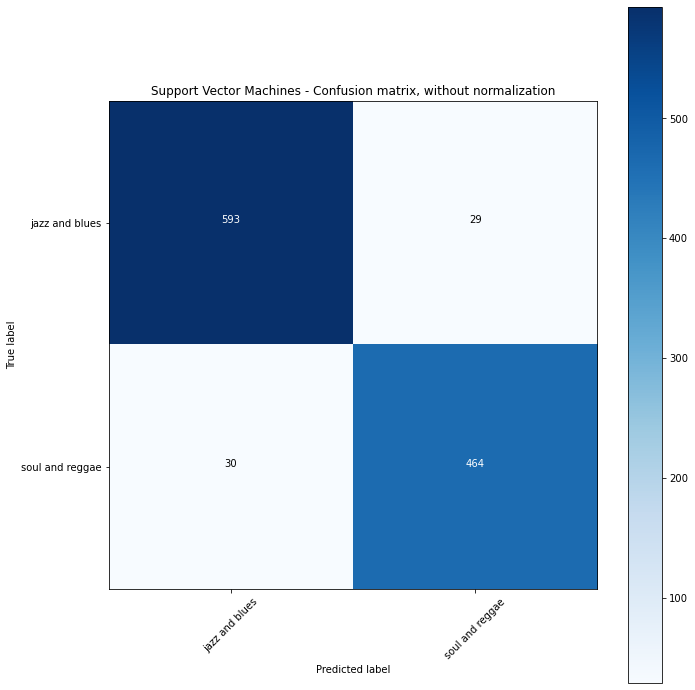

In [78]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), svmmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Support Vector Machines - Confusion matrix, without normalization' )

In [79]:
accuracy_score( Y_test.tolist(), svmmodel_predictions )

0.9471326164874552

In [80]:
precision_score( Y_test.tolist(), svmmodel_predictions )

0.9411764705882353

# RandomForestClassifier

In [81]:
randomForestClassifier_Model = RandomForestClassifier( random_state=1)

In [82]:
randomForestClassifier_Model.fit( X_train, Y_train.astype( int ) )

RandomForestClassifier(random_state=1)

In [85]:
randomForestClassifier_predictions=randomForestClassifier_Model.predict(X_test)

Confusion matrix, without normalization


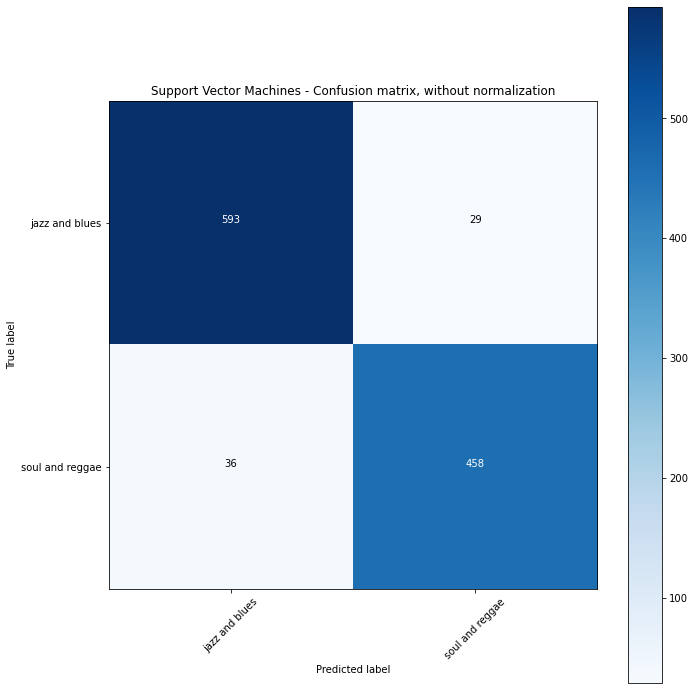

In [87]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), randomForestClassifier_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Support Vector Machines - Confusion matrix, without normalization' )

In [90]:
accuracy_score( Y_test.tolist(), randomForestClassifier_predictions )

0.9417562724014337

In [91]:
precision_score( Y_test.tolist(), randomForestClassifier_predictions )

0.9404517453798767

# RESPUESTAS

1 iDENTI

¿Cuál debe ser la clase positiva y cuál la clase negativa?